Amount of NAs:  0
Amount of Duplicates:  0
 Размер признаков обучающей выборки  (1437, 64) 
 Размер признаков тестовой выборки  (360, 64) 
 Размер целевого показателя признаков обучающей выборки  (1437,) 
 Размер показателя обучающей выборки  (360,)

Logistic Regression
Time used:  1.6899633407592773


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.85      1.00      0.92        34
           2       0.97      1.00      0.99        36
           3       1.00      1.00      1.00        33
           4       1.00      0.98      0.99        42
           5       0.97      0.89      0.93        37
           6       1.00      0.95      0.98        43
           7       0.94      1.00      0.97        31
           8       1.00      0.89      0.94        37
           9       0.97      1.00      0.98        28

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


Support Vector Machine
Time used:  0.8701350688934326
Best model's kernel:  rbf


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.92      0.96        37
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        42
           5       0.97      1.00      0.99        36
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        31
           8       0.92      1.00      0.96        34
           9       1.00      0.97      0.98        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360


K-Nearest Neighbors
Time used:  0.09700226783752441
Best score:  0.9874767549976755
Best num of neighbors:  KNeighborsClassifier(n_neighbors=3)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.92      0.96        37
           2       1.00      1.00      1.00        36
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        42
           5       0.97      1.00      0.99        36
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        31
           8       0.92      1.00      0.96        34
           9       0.96      0.96      0.96        28

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



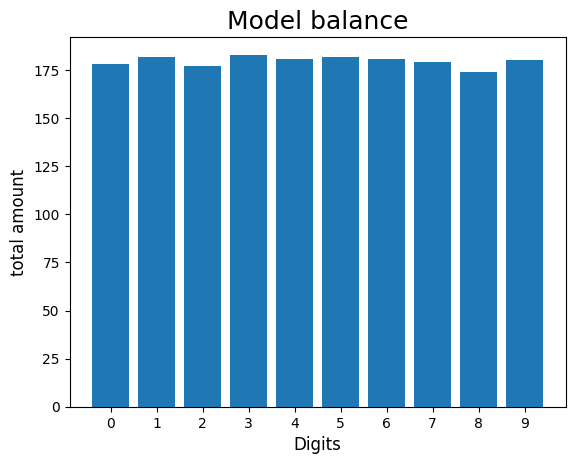

In [34]:
import time
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

def one(df):
    print('Amount of NAs: ',df.data.isna().sum().sum())
    print('Amount of Duplicates: ',df.data.duplicated().sum())

def two(df):
    y = df.target.value_counts(sort=False)
    x = df.target_names
    plt.title("Model balance", fontsize=18)
    plt.xlabel('Digits', fontsize=12)
    plt.ylabel('total amount', fontsize=12)
    plt.xticks(np.arange(start=0, stop=len(x)), size=10)
    plt.bar(x, y)

def log_regression(x_train, y_train, x_test, y_test):
    time_start = time.time()
    model = LogisticRegression(random_state=123, max_iter=2000)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    print("Time used: ", time.time() - time_start)
    #print('Prediction: ', y_predict)
    #print('Origin: ', np.array(y_test))
    fig = px.imshow(confusion_matrix(y_test, y_predict), text_auto=True)
    fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')
    fig.show()
    print(classification_report(y_test, y_predict))

def svm(x_train, y_train, x_test, y_test):
    param_kernel = ('linear', 'rbf', 'poly', 'sigmoid')
    parameters = {'kernel':param_kernel}
    time_start = time.time()
    model = SVC()
    grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv=6)
    grid_search_svm.fit(x_train, y_train)
    print("Time used: ", time.time() - time_start)
    best_model = grid_search_svm.best_estimator_
    svm_preds = best_model.predict(x_test)
    print('Best model\'s kernel: ', best_model.kernel)
    #print('Prediction: ', svm_preds)
    #print('Origin: ', np.array(y_test))
    fig = px.imshow(confusion_matrix(y_test, svm_preds), text_auto=True)
    fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')
    fig.show()
    print(classification_report(svm_preds, y_test))

def knn(x_train, y_train, x_test, y_test):
    num_of_neighbors = np.arange(3, 10, 25)
    params = {"n_neighbors": num_of_neighbors}
    model_KNN = KNeighborsClassifier()
    time_start = time.time()
    grid_search = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)
    grid_search.fit(x_train, y_train)
    knn_preds = grid_search.predict(x_test)
    print("Time used: ", time.time() - time_start)
    print('Best score: ',grid_search.best_score_)
    print('Best num of neighbors: ',grid_search.best_estimator_)
    #print('Prediction: ', knn_preds)
    #print('Origin: ', np.array(y_test))
    fig = px.imshow(confusion_matrix(y_test, knn_preds), text_auto=True)
    fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')
    fig.show()
    print(classification_report(knn_preds, y_test))


def three(df):
    predictors = df.data
    target = df.target
    x_train, x_test, y_train, y_test = train_test_split(predictors, target, train_size=0.8, shuffle=True,
                                                        random_state=123)
    print(' Размер признаков обучающей выборки ', x_train.shape, '\n',
          'Размер признаков тестовой выборки ', x_test.shape, '\n',
          'Размер целевого показателя признаков обучающей выборки ', y_train.shape, '\n',
          'Размер показателя обучающей выборки ', y_test.shape)
    print('\nLogistic Regression')
    log_regression(x_train, y_train, x_test, y_test)
    print('\nSupport Vector Machine')
    svm(x_train, y_train, x_test, y_test)
    print('\nK-Nearest Neighbors')
    knn(x_train, y_train, x_test, y_test)

if __name__ == '__main__':
    data = load_digits(as_frame=True)
    one(data)
    two(data)
    three(data)



